# 5 Review of a Minimal, SB3-compatible Environment `rampup-v1` with A2C

In [1]:
import os
import subprocess
import numpy as np
import webbrowser
import gym
from gym import spaces
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.cmd_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy

from plan_opt.demand import Demand
from plan_opt.demand_small_samples import four_weeks_uprising
from plan_opt.envs.rampup1 import RampupEnv1

### Preparation

Demand is created deterministically from a hand-crafted blueprint of just four weeks of data for a fleet of size 1.
The action space is descrete, only categorical changes of equipment are allowed.

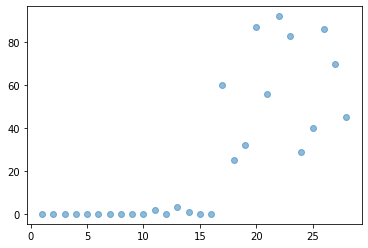

In [2]:
demand = Demand(period=len(four_weeks_uprising), data=four_weeks_uprising)
demand.show(only_data=True)

Altough the environment is registered with Gym as 'rampup-v1', it is imported straight from the module here. See notebook 05 using the registration with Gym.

In [3]:
env = RampupEnv1(demand)

In [4]:
algorithm = "A2C"
timesteps = 20000
tensorboard_log = "logs/rampup_tensorboard/"
tb_log_suffix = f"{str(timesteps)[:-3]}k"
print(f"Tensorboard logs saved with suffix {tb_log_suffix}")

Tensorboard logs saved with suffix 20k


### Train the model

In [5]:
%%time
deterministic = False
model = A2C("MlpPolicy", env, tensorboard_log=tensorboard_log, verbose=1)
model.learn(
    total_timesteps=timesteps,
    eval_freq=100,
    tb_log_name=f"A2C_train_run_{tb_log_suffix}",
)

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to logs/rampup_tensorboard/A2C_train_run_20k_2
-------------------------------------
| time/                 |           |
|    fps                | 1289      |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.31     |
|    explained_variance | -6.94e+06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.66e+03 |
|    value_loss         | 1.16e+07  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1172     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.825   |
|    explained_variance | -1.6e+07 |
|    learning_rate      | 0.

------------------------------------
| time/                 |          |
|    fps                | 1175     |
|    iterations         | 1700     |
|    time_elapsed       | 7        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.0966  |
|    explained_variance | -8.9e+04 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 85.3     |
|    value_loss         | 2.71e+08 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1180      |
|    iterations         | 1800      |
|    time_elapsed       | 7         |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.548    |
|    explained_variance | -3.04e+07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -1.93e+03 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1221      |
|    iterations         | 3300      |
|    time_elapsed       | 13        |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | -3.42e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -1.86e+03 |
|    value_loss         | 3.43e+07  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1224      |
|    iterations         | 3400      |
|    time_elapsed       | 13        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.468    |
|    explained_variance | -4.09e+15 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -2.47e+03 |
|    value_l

### Simple Evaluation

In [6]:
env.fill_table = True
obs = env._set_initial_state(initial_state_status=3)
while not env.done:
    action, _states = model.predict(obs, deterministic=deterministic)
    obs, reward, done, info = env.step(action)
env.render()
env.episode_table

Reward so far: 42000
Economic potential: 41000
Lost potential: -1000 (-2.439%)



,Current demand,Next demand,Action,Action description,Reward
0,0.0,0.0,3.0,STORE,-500.0
1,0.0,0.0,3.0,STORE,-500.0
2,0.0,0.0,3.0,STORE,-500.0
3,0.0,0.0,3.0,STORE,-500.0
4,0.0,0.0,1.0,PREPARE,-2000.0
5,0.0,0.0,1.0,PREPARE,-2000.0
6,0.0,0.0,1.0,PREPARE,-2000.0
7,0.0,0.0,1.0,PREPARE,-2000.0
8,0.0,0.0,3.0,STORE,-500.0
9,0.0,2.0,3.0,STORE,-500.0


## Evaluation

In [7]:
# Separate evaluation env
# eval_env = RampupEnv1(demand)
eval_env = env
# Use deterministic actions for evaluation (that seems like #bs)
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/",
    log_path="./logs/",
    eval_freq=100,
    deterministic=deterministic,
    render=False,
)

eval_model = A2C("MlpPolicy", eval_env, tensorboard_log=tensorboard_log, verbose=1)
eval_model.learn(
    total_timesteps=timesteps,
    callback=eval_callback,
    tb_log_name=f"A2C_eval_run_{tb_log_suffix}",
)

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to logs/rampup_tensorboard/A2C_eval_run_20k_2
Eval num_timesteps=100, episode_reward=-11200.00 +/- 8992.22
Episode length: 15.00 +/- 5.48
New best mean reward!
Eval num_timesteps=200, episode_reward=11100.00 +/- 6865.86
Episode length: 18.00 +/- 7.92
New best mean reward!
Eval num_timesteps=300, episode_reward=5800.00 +/- 12643.58
Episode length: 13.20 +/- 7.22
Eval num_timesteps=400, episode_reward=2100.00 +/- 7499.33
Episode length: 11.00 +/- 9.42
Eval num_timesteps=500, episode_reward=15400.00 +/- 4200.00
Episode length: 12.80 +/- 6.65
New best mean reward!
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 12.8      |
|    mean_reward        | 1.54e+04  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |      

Eval num_timesteps=3700, episode_reward=43000.00 +/- 5567.76
Episode length: 18.20 +/- 6.46
Eval num_timesteps=3800, episode_reward=31800.00 +/- 13470.71
Episode length: 12.00 +/- 7.62
Eval num_timesteps=3900, episode_reward=42900.00 +/- 15464.15
Episode length: 13.00 +/- 6.69
Eval num_timesteps=4000, episode_reward=34000.00 +/- 18936.74
Episode length: 17.20 +/- 7.83
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 17.2      |
|    mean_reward        | 3.4e+04   |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 800       |
|    time_elapsed       | 5         |
|    total_timesteps    | 4000      |
| train/                |           |
|    entropy_loss       | -0.241    |
|    explained_variance | -2.94e+08 |
|    learning_rate      | 0.0007    |
|    n_updates          | 799       |
|    policy_loss        | 1.83e+03  |
|    value_loss         | 1.14e+09  |
---------------------

Eval num_timesteps=7600, episode_reward=48600.00 +/- 4789.57
Episode length: 13.60 +/- 4.76
New best mean reward!
Eval num_timesteps=7700, episode_reward=31300.00 +/- 17721.74
Episode length: 15.20 +/- 8.40
Eval num_timesteps=7800, episode_reward=46700.00 +/- 3370.46
Episode length: 20.40 +/- 2.42
Eval num_timesteps=7900, episode_reward=40400.00 +/- 15435.02
Episode length: 14.00 +/- 5.48
Eval num_timesteps=8000, episode_reward=28300.00 +/- 16039.33
Episode length: 13.60 +/- 9.33
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 13.6      |
|    mean_reward        | 2.83e+04  |
| time/                 |           |
|    fps                | 800       |
|    iterations         | 1600      |
|    time_elapsed       | 9         |
|    total_timesteps    | 8000      |
| train/                |           |
|    entropy_loss       | -0.477    |
|    explained_variance | -2.36e+04 |
|    learning_rate      | 0.0007    |
|    n_updates       

Eval num_timesteps=11600, episode_reward=42800.00 +/- 7613.15
Episode length: 19.20 +/- 6.71
Eval num_timesteps=11700, episode_reward=38400.00 +/- 21214.15
Episode length: 16.80 +/- 8.93
Eval num_timesteps=11800, episode_reward=48500.00 +/- 3193.74
Episode length: 22.60 +/- 6.47
Eval num_timesteps=11900, episode_reward=42100.00 +/- 15954.31
Episode length: 15.80 +/- 7.19
Eval num_timesteps=12000, episode_reward=45600.00 +/- 3760.32
Episode length: 16.60 +/- 6.59
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 16.6      |
|    mean_reward        | 4.56e+04  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 2400      |
|    time_elapsed       | 15        |
|    total_timesteps    | 12000     |
| train/                |           |
|    entropy_loss       | -0.422    |
|    explained_variance | -2.5e+13  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2399      |
|

Eval num_timesteps=15500, episode_reward=40500.00 +/- 12601.59
Episode length: 9.60 +/- 4.59
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 9.6       |
|    mean_reward        | 4.05e+04  |
| time/                 |           |
|    fps                | 809       |
|    iterations         | 3100      |
|    time_elapsed       | 19        |
|    total_timesteps    | 15500     |
| train/                |           |
|    entropy_loss       | -0.203    |
|    explained_variance | -3.55e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3099      |
|    policy_loss        | -63.4     |
|    value_loss         | 8.75e+05  |
-------------------------------------
Eval num_timesteps=15600, episode_reward=44900.00 +/- 16128.86
Episode length: 13.60 +/- 5.24
Eval num_timesteps=15700, episode_reward=43300.00 +/- 15038.62
Episode length: 16.00 +/- 7.90
Eval num_timesteps=15800, episode_reward=47800.00 +/- 11483.03
Episode le

Eval num_timesteps=19100, episode_reward=40000.00 +/- 17073.37
Episode length: 12.80 +/- 7.55
Eval num_timesteps=19200, episode_reward=46600.00 +/- 3733.63
Episode length: 21.00 +/- 7.07
Eval num_timesteps=19300, episode_reward=50400.00 +/- 4079.22
Episode length: 17.00 +/- 6.07
Eval num_timesteps=19400, episode_reward=49800.00 +/- 3854.87
Episode length: 18.20 +/- 6.68
Eval num_timesteps=19500, episode_reward=55700.00 +/- 2014.94
Episode length: 12.60 +/- 4.03
New best mean reward!
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 12.6     |
|    mean_reward        | 5.57e+04 |
| time/                 |          |
|    fps                | 806      |
|    iterations         | 3900     |
|    time_elapsed       | 24       |
|    total_timesteps    | 19500    |
| train/                |          |
|    entropy_loss       | -0.278   |
|    explained_variance | nan      |
|    learning_rate      | 0.0007   |
|    n_updates          | 3899 

In [8]:
eval_env.fill_table = True
obs = eval_env._set_initial_state(initial_state_status=3)
while not eval_env.done:
    action, _states = eval_model.predict(obs, deterministic=True)
    obs, reward, done, info = eval_env.step(action)
eval_env.render()
eval_env.episode_table

Reward so far: 43000
Economic potential: 41000
Lost potential: -2000 (-4.878%)



,Current demand,Next demand,Action,Action description,Reward
0,0.0,0.0,3.0,STORE,-500.0
1,0.0,0.0,3.0,STORE,-500.0
2,0.0,0.0,3.0,STORE,-500.0
3,0.0,0.0,3.0,STORE,-500.0
4,0.0,0.0,3.0,STORE,-500.0
5,0.0,0.0,3.0,STORE,-500.0
6,0.0,0.0,3.0,STORE,-500.0
7,0.0,0.0,3.0,STORE,-500.0
8,0.0,0.0,3.0,STORE,-500.0
9,0.0,2.0,3.0,STORE,-500.0


In [9]:
mean_reward, std_reward = evaluate_policy(eval_model, eval_env)
print(
    f"Policy evaluated for 10 episodes with a mean reward of {int(mean_reward)} and a standard deviation of {int(std_reward)}."
)

Policy evaluated for 10 episodes with a mean reward of 44700 and a standard deviation of 8803.


### Tensorboard
Start Tensorboard on port 6006 and open it in a browser.

In [10]:
if 1 == 0:
    pid = subprocess.Popen(
        ["tensorboard", "--logdir", f"./{tensorboard_log}", "--port", "6006"]
    )
    os.system("sleep 5")
    webbrowser.open("http://localhost:6006")

In [11]:
# Alternatively, load the TensorBoard notebook extension
# %load_ext tensorboard
# %tensorboard --logdir ./rampup_tensorboard/

To wrap up, kill the Tensorboard process.

In [12]:
if 1 == 0:
    os.system("kill -9 $(lsof -t -i:6006)")